In [1]:
# import liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Imports successful")


Matplotlib is building the font cache; this may take a moment.


✓ Imports successful


In [3]:
#load metadata
metadata_path='../data/raw/HAM10000_metadata'

df=pd.read_csv(metadata_path)
print(f'Dataset SHape : {df.shape}')
print(f'TOtal Columns : {df.columns.tolist()}')
print(f'First five Rows : {df.head(3)}')

Dataset SHape : (10015, 8)
TOtal Columns : ['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization', 'dataset']
First five Rows :      lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   

        dataset  
0  vidir_modern  
1  vidir_modern  
2  vidir_modern  


====================  CLass Distribution ====================
dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64
TOtal Images : 10015

Percentages:
 nv:66.9%
 mel:11.1%
 bkl:11.0%
 bcc:5.1%
 akiec:3.3%
 vasc:1.4%
 df:1.1%


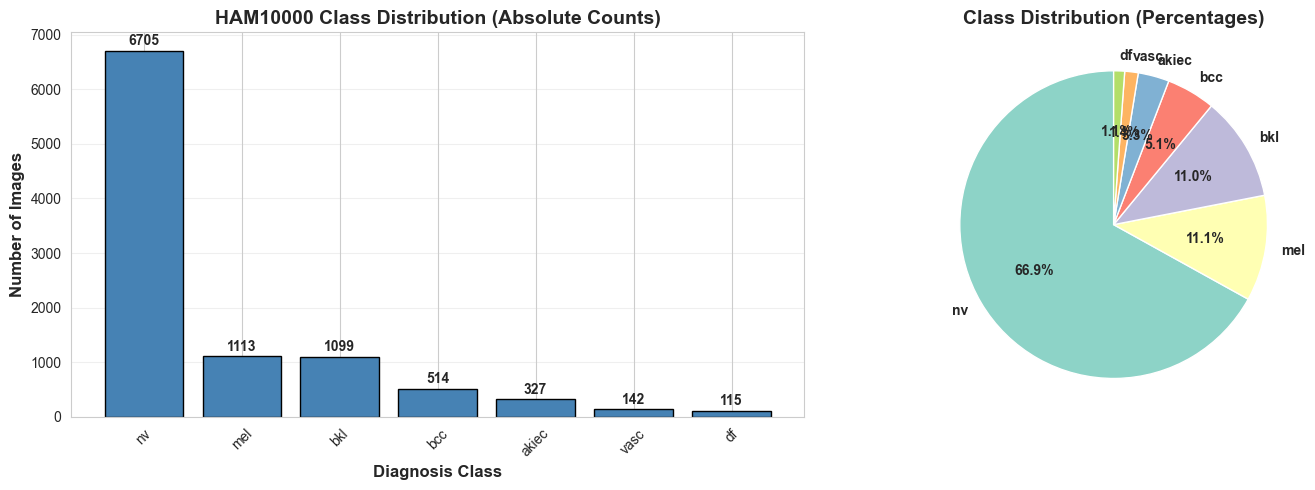


KEY INSIGHT: SEVERE CLASS IMBALANCE!
Majority class (nv): 66.9% (6705 images)
Rarest class (df): 1.1% (115 images)
Imbalance ratio: 58.3:1


In [26]:
#class distributioin
print(f"{'=' * 20}  CLass Distribution {'=' * 20}")

class_counts=df['dx'].value_counts()
print(class_counts)
print(f'TOtal Images : {len(df)}')

#calculate percentage
class_percentage= (class_counts/len(df)* 100 ).round(1)
print(f"\nPercentages:")
for cls,pct in class_percentage.items():
    print(f" {cls}:{pct}%")
    
#visualize
fig, axes = plt.subplots(1,2, figsize=(15,5))

#bar Plot
axes[0].bar(class_counts.index ,class_counts.values,color='steelblue',edgecolor='black')
axes[0].set_xlabel('Diagnosis Class', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Images', fontsize=12, fontweight='bold')
axes[0].set_title('HAM10000 Class Distribution (Absolute Counts)', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

#total nubmber of values in each class above the bar
for i, (cls, count) in enumerate(class_counts.items()):
    axes[0].text(i, count + 100, str(count), ha='center', fontweight='bold')

#pie chart with percentage
colors = plt.cm.Set3(range(len(class_counts)))
axes[1].pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%',
            startangle=90, colors=colors, textprops={'fontweight': 'bold'})
axes[1].set_title('Class Distribution (Percentages)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../logs/class_distribution.png', dpi=150, bbox_inches='tight')
plt.show()


# key insight
print("\n" + "="*60)
print("KEY INSIGHT: SEVERE CLASS IMBALANCE!")
print("="*60)
print(f"Majority class (nv): {class_percentage['nv']}% ({class_counts['nv']} images)")
print(f"Rarest class (df): {class_percentage['df']}% ({class_counts['df']} images)")
print(f"Imbalance ratio: {class_counts['nv'] / class_counts['df']:.1f}:1")

